<a href="https://colab.research.google.com/github/Sandi-DeLaVega/Tensorflow-Practice/blob/main/Computer_Vision_Practice_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Computer Vision


Perform Image Classification and Object Detection/Recognition Using Convolutional Neural network

###Goal: To Classify and Detect Images or Specify Objects from Within the Image Using the Image data as features and label



#Image Data

## 3 Dimensions  of Image

*   Image Height
*   Image Width
*   Color Channels (Range of 0 - 255)
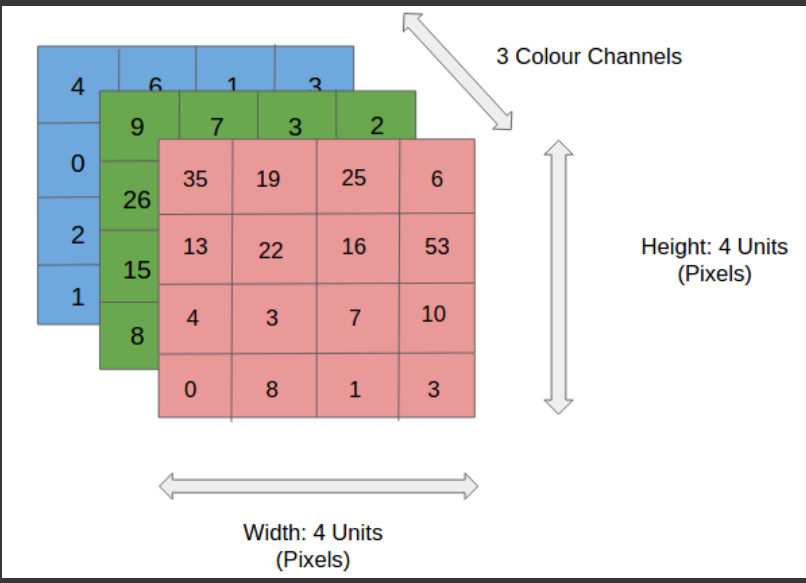




#Convolutional Layer
Fundamental difference between a dense layer and a convolutional layer:
*   dense layers detect patterns globally 
 - consider the ENTIRE image
 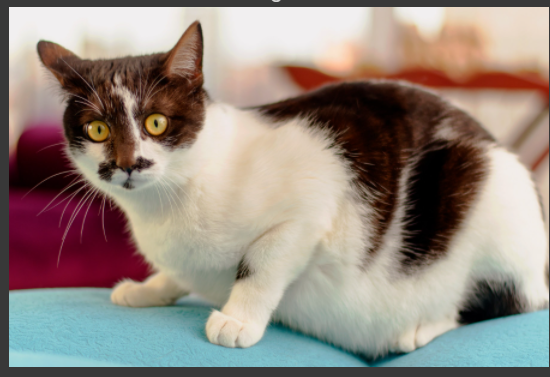
*   convolutional layers detect patterns locally
      - look at specific parts of the image
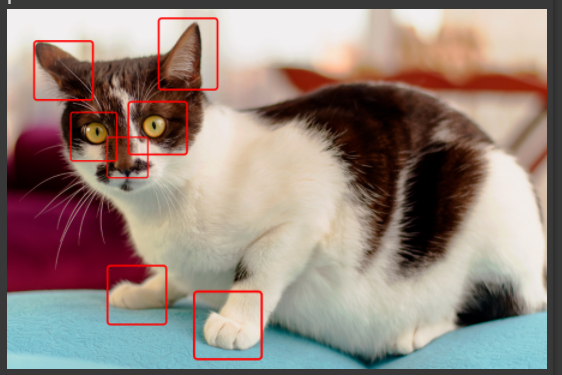


#Creating a ConvNet

In [2]:
%tensorflow_version 2.x #this line is not requried unless you are in a notebook
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #this line is not requried unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
#Load and Split DataSet
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize Pixel Values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird','cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 4s 0us/step


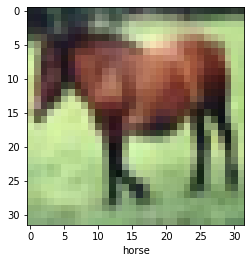

In [4]:
#Let's look at one image
IMG_INDEX = 7 #Change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

#CNN Architecture
Common Architecture for CNN : Conv2D and MaxPooling2D Layers
Stack of Convolutional and MaxPooling Layers extract the features from the Image
then features flattened and fed to densly connected layers that determine the class of an image based on the presence of features


###Convolutional Base

In [7]:
model = models.Sequential()
#Layer 1 with shape of data 32,32,3
#32 filters with size of 3x3
model.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (32,32,3)))
#Max Pooling Operation using 2x2 Samples and a Stride of 2
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


#Adding Dense Layers

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

#Training

In [13]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 4,
                    validation_data = (test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 60s 38ms/step - loss: 1.7271 - accuracy: 0.3627 - val_loss: 1.2857 - val_accuracy: 0.5356
Epoch 2/4
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1782 - accuracy: 0.5820 - val_loss: 1.1232 - val_accuracy: 0.6003
Epoch 3/4
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0090 - accuracy: 0.6412 - val_loss: 0.9608 - val_accuracy: 0.6642
Epoch 4/4
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8997 - accuracy: 0.6862 - val_loss: 0.9077 - val_accuracy: 0.6851


#Evaluating the Model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 3s - loss: 0.9077 - accuracy: 0.6851
0.6851000189781189


#Working with Small Datasets
##By Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one. 
Performing Random Transformations on our Images so that our model can generalize better. Use Keras Package for the Transformation
Transformations can be either:
*   Compressions
* Rotations
* Stretches
*   Color Changes



In [17]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#creates a data generator object that transforms images
datagen = ImageDataGenerator(
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = "nearest"
)

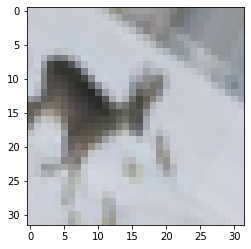

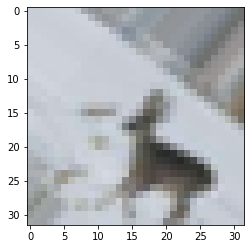

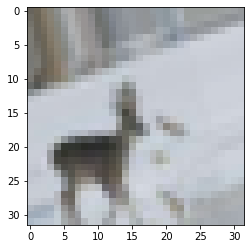

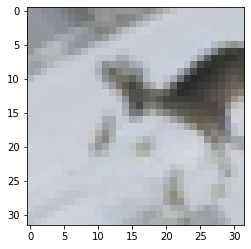

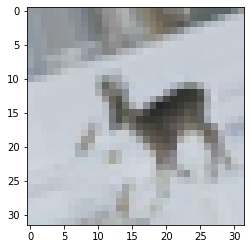

In [18]:
#pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img) #convert image to numpy array
img = img.reshape((1, ) + img.shape) #reshape image

i = 0

for batch in datagen.flow(img, save_prefix = "test", save_format = "jpeg"):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4: #show 4 images
    break

plt.show()

#PreTrained Models


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

#DataSet
cats_vs_dogs from the module tensorflow_datasets
-contains (image, label) pairs where images have different dimensions and 3 color channels


In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]','train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True,
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteTSZKO3/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


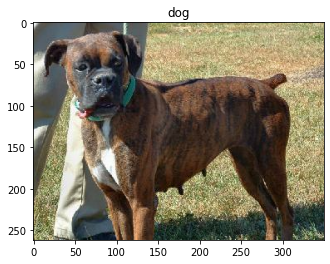

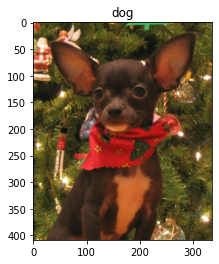

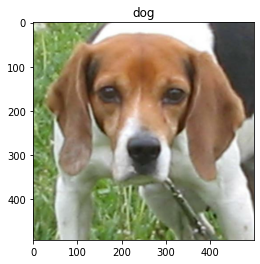

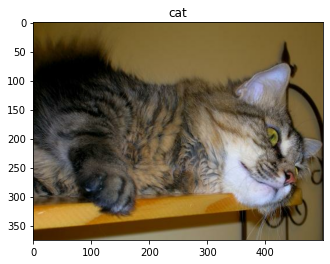

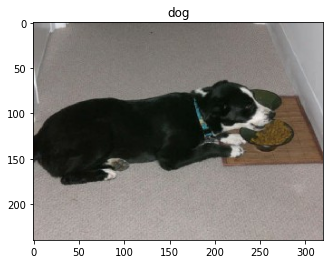

In [4]:
get_label_name = metadata.features['label'].int2str #creates a function object that we can use to get labels

#display 2 images form the datasets
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

#Data Processing
Converting to Same Size

In [5]:
IMG_SIZE = 160 #All images resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image,tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

Apply format_example to all images using .map()

In [6]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Looking at the Images

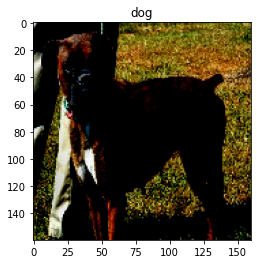

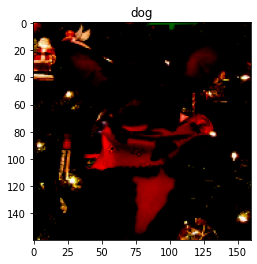

In [7]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

#Shuffling and Batching Images

In [8]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Original vs New Image

In [9]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New Shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New Shape: (160, 160, 3)
New Shape: (160, 160, 3)


#Picking a PreTrained Model
Use Convolutional Base = MobileNet V2 developed at Google
- trained on 1.4 million images and has 1000 different classes
tell the model what input shape to expect and to use the predetermined weights from imagenet (Google Dataset)


In [10]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#create the base model from the pre-trained model MObileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                               include_top = False,
                                               weights = 'imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [11]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

Base model will simply output a shape (32,5,5,1280) tensor => feature extraction from original (1,160, 160,3) image.
32 layes of different filters/features

In [12]:
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


#Freezing the Base

Freezing = disablign the training property of a layer
Won't make any changes to the weights of any layers that are frozen during training

In [ ]:
base_model.trainable = False

In [13]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

#Adding Classifier

Instead of flattening the feature map o fthe base layer, use GLOBAL AVERAGE POOLING LAYER that will average the entire 5x5 area of each 2D feature map. Return a single 1280 element vector per filter

In [14]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Add Prediction layer that will be a single dense neuron

In [15]:
prediction_layer = keras.layers.Dense(1)

Combined the layers together in a model

In [16]:
model = tf.keras.Sequential([base_model, global_average_layer, prediction_layer])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


#Training the Model

In [18]:
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [19]:
#Evaluate the model right now 
initial_epochs = 3
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 13s 573ms/step - loss: 0.7799 - accuracy: 0.5242


In [20]:
#Now we can train it on our images
history = model.fit(train_batches, epochs = initial_epochs, validation_data = validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 1821s 3s/step - loss: 0.0841 - accuracy: 0.9672 - val_loss: 0.0749 - val_accuracy: 0.9841
Epoch 2/3
582/582 [==============================] - 1804s 3s/step - loss: 0.0272 - accuracy: 0.9897 - val_loss: 0.0830 - val_accuracy: 0.9875
Epoch 3/3
582/582 [==============================] - 1821s 3s/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 0.1622 - val_accuracy: 0.9759
[0.9672219157218933, 0.9896829724311829, 0.9940891861915588]


In [22]:
model.save("dogs_vs_cats.h5")
#save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')